In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
memes = pd.read_csv('MEMES_new_short.csv')
memes.head()

Unnamed: 0                                         name      status  \
0           0                                   Muvvafukka  Submission   
1           1  Martyrdom (Drop a Live Grenade When Killed)  Submission   
2           2                                 Wet Kylo Ren  Submission   
3           3                               You're Invited  Submission   
4           4            Companies Posting Their Own Names  Submission   

                  type origin_year  \
0          Viral Video        2019   
1             Reaction        2007   
2          Image Macro        2019   
3               Parody        2019   
4  Participatory Media        2019   

                                       origin_place  \
0                                          Facebook   
1                    Call of Duty 4: Modern Warfare   
2  Star Wars: The Rise of Skywalker (Movie Trailer)   
3                                            TikTok   
4                                          Facebook   

                  date_added  views  videos  photos  comments  \
0  2019-10-24T04:05:03-04:00  13613       0       7         8   
1  2019-10-23T12:13:13-04:00  13973       0      17         8   
2  2019-10-23T11:56:19-04:00   5339       0      12         7   
3  2019-10-23T10:32:04-04:00   2249       0       0         0   
4  2019-10-25T12:42:22-04:00   5662       0      16        33   

                                                tags  \
0  jay-lee hilzinger & maddie flynn, eshayz, davi...   
1  perk, martyrdom, live grenade, reaction image,...   
2  kylo ren, star wars the rise of skywalker, ada...   
3             byob, byow, party, flyer, charge, door   
4  social media campaign, brands, companies, max ...   

                                               about  \
0  Muvvafukka refers to a viral video of two teen...   
1  Martyrdom (Drop a Live Grenade When Killed) re...   
2  Wet Kylo Ren is an image macro series based on...   
3  You're Invited is a series of TikTok videos pa...   
4  Companies Posting Their Own Names refers to a ...   

                                              origin  \
0  While it appears the original video is deleted...   
1  On April 12th, 2007, first person shooter Call...   
2  On October 21st, 2019, the final trailer for t...   
3  On October 13th, 2019, TikTok user @coolguycol...   
4  On October 18th, 2019, Australian musician and...   

                                          other_text  
0  Butler also made a screenshot of Hilzinger's f...  
1  Spread The exact first instance of use of the ...  
2  Shortly after the trailer's release, some on T...  
3  Spread On October 15th, 2019, @moneyxmo upload...  
4  Before October 2019, a number of companies and...

In [3]:
memes.describe()

Unnamed: 0         views       videos        photos     comments
count  4206.000000  4.206000e+03  4206.000000   4206.000000  4206.000000
mean   2102.500000  7.226205e+04     5.820257     51.473371    39.009510
std    1214.311945  2.470807e+05    19.757376    497.391877    97.193556
min       0.000000  9.700000e+01    -1.000000      0.000000     0.000000
25%    1051.250000  3.874750e+03     0.000000      1.000000     4.000000
50%    2102.500000  1.574300e+04     0.000000     10.000000    13.000000
75%    3153.750000  5.336375e+04     4.000000     26.000000    35.750000
max    4205.000000  9.095857e+06   469.000000  28911.000000  1713.000000

In [4]:
memes.describe(include='object')

name      status         type origin_year origin_place  \
count         4206        4206         1786        4206         4205   
unique        4205           3           98         117         1885   
top     NO REFUNDS  Submission  Exploitable     Unknown      Unknown   
freq             2        2482          152         349          535   

                       date_added     tags  \
count                        4206     4205   
unique                       4204     4001   
top     2016-10-16T01:19:03-04:00  none...   
freq                            2      168   

                                                    about  origin  \
count                                                3798    2524   
unique                                               3648    2501   
top     NOTE: This Entry was related to the 2013 April...  \n\n\n   
freq                                                   58      11   

                                               other_text  
count                                                3508  
unique                                               3503  
top     Spread Various Examples Templates Search Inter...  
freq                                                    3

In [5]:
mx= memes.views.max()
mx

9095857

In [6]:
memes.query('views == @mx')

Unnamed: 0      name     status       type origin_year origin_place  \
3958        3958  Me Gusta  Confirmed  Character        2010        4chan   

                     date_added    views  videos  photos  comments  \
3958  2018-09-27T16:03:51-04:00  9095857      21     518       142   

                                                   tags  \
3958  4chan, rageguy, spinoff, 4 panel comic, me gus...   

                                                  about  \
3958  Me Gusta is a rage comic face that is typicall...   

                                                 origin  \
3958  The colloquial Spanish phrase "Me Gusta" was f...   

                                             other_text  
3958  Spread In December 2010, the single topic blog...

In [7]:
memes.dtypes

Unnamed: 0       int64
name            object
status          object
type            object
origin_year     object
origin_place    object
date_added      object
views            int64
videos           int64
photos           int64
comments         int64
tags            object
about           object
origin          object
other_text      object
dtype: object

In [8]:
memes['timestamp'] = pd.to_datetime(memes.date_added)

In [9]:
memes.head()

Unnamed: 0                                         name      status  \
0           0                                   Muvvafukka  Submission   
1           1  Martyrdom (Drop a Live Grenade When Killed)  Submission   
2           2                                 Wet Kylo Ren  Submission   
3           3                               You're Invited  Submission   
4           4            Companies Posting Their Own Names  Submission   

                  type origin_year  \
0          Viral Video        2019   
1             Reaction        2007   
2          Image Macro        2019   
3               Parody        2019   
4  Participatory Media        2019   

                                       origin_place  \
0                                          Facebook   
1                    Call of Duty 4: Modern Warfare   
2  Star Wars: The Rise of Skywalker (Movie Trailer)   
3                                            TikTok   
4                                          Facebook   

                  date_added  views  videos  photos  comments  \
0  2019-10-24T04:05:03-04:00  13613       0       7         8   
1  2019-10-23T12:13:13-04:00  13973       0      17         8   
2  2019-10-23T11:56:19-04:00   5339       0      12         7   
3  2019-10-23T10:32:04-04:00   2249       0       0         0   
4  2019-10-25T12:42:22-04:00   5662       0      16        33   

                                                tags  \
0  jay-lee hilzinger & maddie flynn, eshayz, davi...   
1  perk, martyrdom, live grenade, reaction image,...   
2  kylo ren, star wars the rise of skywalker, ada...   
3             byob, byow, party, flyer, charge, door   
4  social media campaign, brands, companies, max ...   

                                               about  \
0  Muvvafukka refers to a viral video of two teen...   
1  Martyrdom (Drop a Live Grenade When Killed) re...   
2  Wet Kylo Ren is an image macro series based on...   
3  You're Invited is a series of TikTok videos pa...   
4  Companies Posting Their Own Names refers to a ...   

                                              origin  \
0  While it appears the original video is deleted...   
1  On April 12th, 2007, first person shooter Call...   
2  On October 21st, 2019, the final trailer for t...   
3  On October 13th, 2019, TikTok user @coolguycol...   
4  On October 18th, 2019, Australian musician and...   

                                          other_text  \
0  Butler also made a screenshot of Hilzinger's f...   
1  Spread The exact first instance of use of the ...   
2  Shortly after the trailer's release, some on T...   
3  Spread On October 15th, 2019, @moneyxmo upload...   
4  Before October 2019, a number of companies and...   

                   timestamp  
0  2019-10-24 04:05:03-04:00  
1  2019-10-23 12:13:13-04:00  
2  2019-10-23 11:56:19-04:00  
3  2019-10-23 10:32:04-04:00  
4  2019-10-25 12:42:22-04:00

In [10]:
memes['Year'] = memes.timestamp.apply(lambda x: x.year)
memes['Month'] = memes.timestamp.apply(lambda x: x.month)
memes['Day'] = memes.timestamp.apply(lambda x: x.day)
memes['Hour'] = memes.timestamp.apply(lambda x: x.hour)
memes['Weekday'] = memes.timestamp.apply(lambda x: x.weekday())

In [11]:
memes['days_from_creation'] = (memes['timestamp'].max() - memes['timestamp']).dt.days

In [12]:
memes.head()

Unnamed: 0                                         name      status  \
0           0                                   Muvvafukka  Submission   
1           1  Martyrdom (Drop a Live Grenade When Killed)  Submission   
2           2                                 Wet Kylo Ren  Submission   
3           3                               You're Invited  Submission   
4           4            Companies Posting Their Own Names  Submission   

                  type origin_year  \
0          Viral Video        2019   
1             Reaction        2007   
2          Image Macro        2019   
3               Parody        2019   
4  Participatory Media        2019   

                                       origin_place  \
0                                          Facebook   
1                    Call of Duty 4: Modern Warfare   
2  Star Wars: The Rise of Skywalker (Movie Trailer)   
3                                            TikTok   
4                                          Facebook   

                  date_added  views  videos  photos  ...  \
0  2019-10-24T04:05:03-04:00  13613       0       7  ...   
1  2019-10-23T12:13:13-04:00  13973       0      17  ...   
2  2019-10-23T11:56:19-04:00   5339       0      12  ...   
3  2019-10-23T10:32:04-04:00   2249       0       0  ...   
4  2019-10-25T12:42:22-04:00   5662       0      16  ...   

                                               about  \
0  Muvvafukka refers to a viral video of two teen...   
1  Martyrdom (Drop a Live Grenade When Killed) re...   
2  Wet Kylo Ren is an image macro series based on...   
3  You're Invited is a series of TikTok videos pa...   
4  Companies Posting Their Own Names refers to a ...   

                                              origin  \
0  While it appears the original video is deleted...   
1  On April 12th, 2007, first person shooter Call...   
2  On October 21st, 2019, the final trailer for t...   
3  On October 13th, 2019, TikTok user @coolguycol...   
4  On October 18th, 2019, Australian musician and...   

                                          other_text  \
0  Butler also made a screenshot of Hilzinger's f...   
1  Spread The exact first instance of use of the ...   
2  Shortly after the trailer's release, some on T...   
3  Spread On October 15th, 2019, @moneyxmo upload...   
4  Before October 2019, a number of companies and...   

                   timestamp  Year Month  Day  Hour  Weekday  \
0  2019-10-24 04:05:03-04:00  2019    10   24     4        3   
1  2019-10-23 12:13:13-04:00  2019    10   23    12        2   
2  2019-10-23 11:56:19-04:00  2019    10   23    11        2   
3  2019-10-23 10:32:04-04:00  2019    10   23    10        2   
4  2019-10-25 12:42:22-04:00  2019    10   25    12        4   

   days_from_creation  
0                  13  
1                  14  
2                  14  
3                  14  
4                  12  

[5 rows x 22 columns]

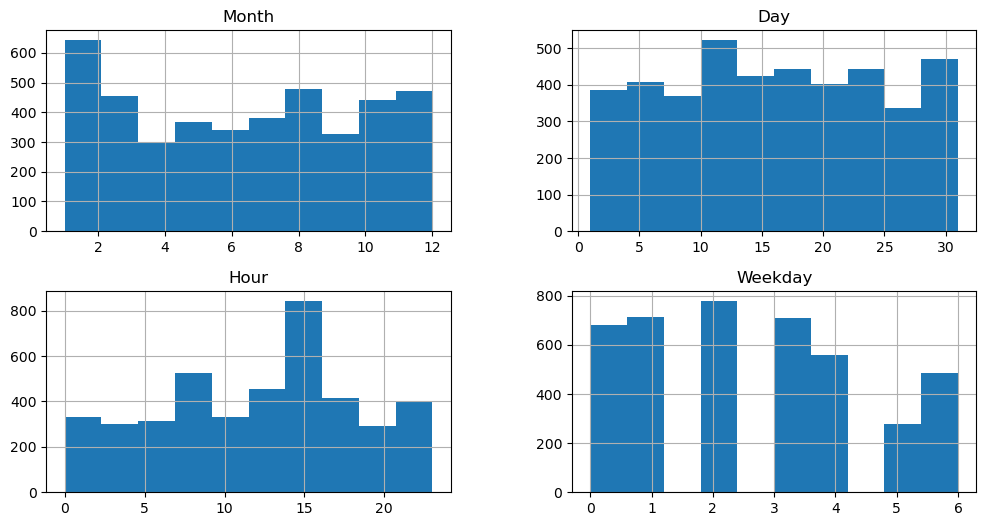

In [13]:
times = ['Month','Day','Hour','Weekday']
memes[times].hist(figsize = (12,6));

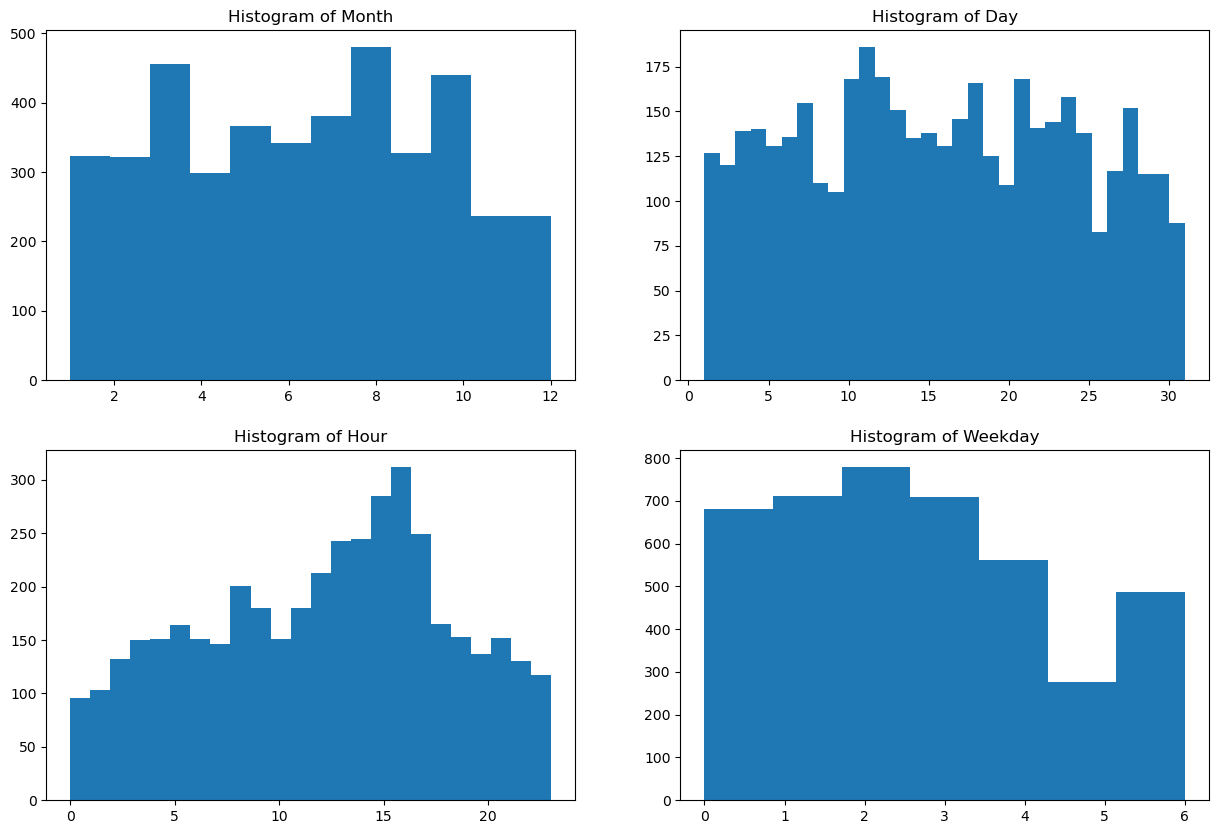

In [14]:
index = 0

fig, ax = plt.subplots(2,2, figsize =(15,10))

bins = [12,31,24,7]
for i in range(2):
    for j in range(2):
        ax[i,j].hist(memes[times[index]], bins = bins[index])
        ax[i,j].set_title('Histogram of {}'.format(times[index]))
        index +=1
fig.subplots_adjust(hspace = 0.2)

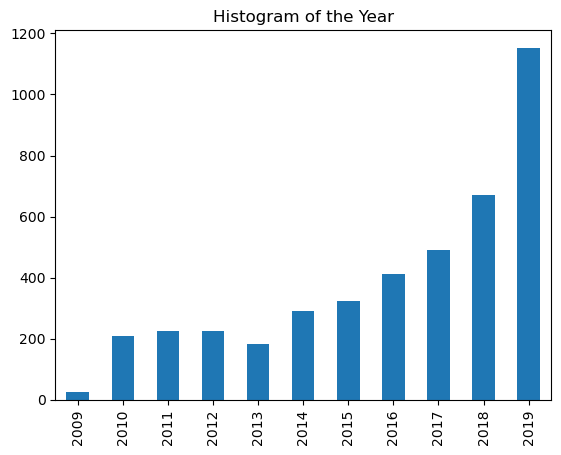

In [15]:
memes.Year.value_counts().sort_index().plot(kind = 'bar')
plt.title('Histogram of the Year');

In [16]:
memes.origin_year.value_counts().sort_index()[:10]

1100    2
1111    1
1415    1
1495    1
1531    1
1564    1
1580    1
1596    1
1776    1
1785    1
Name: origin_year, dtype: int64

In [17]:
memes.loc[memes.origin_year == 'Unknown', 'origin_year'] = None

In [18]:
memes.origin_year.isnull().sum()

349

In [19]:
#check if  x value is digit
usl = memes.origin_year.apply(lambda x: str(x).isdigit())

In [20]:
#  ~means NOT, condition is not met
memes.loc[~usl,'origin_year'] = 0

In [21]:
memes['origin_year'] = memes.origin_year.astype(int)

<AxesSubplot:>

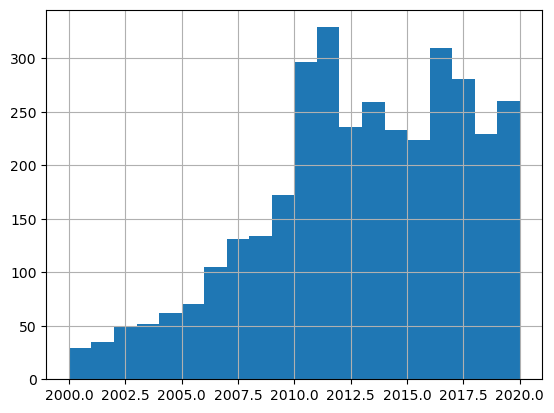

In [22]:
memes.query('origin_year >= 2000 and origin_year <= 2020').origin_year.hist(bins = 20)

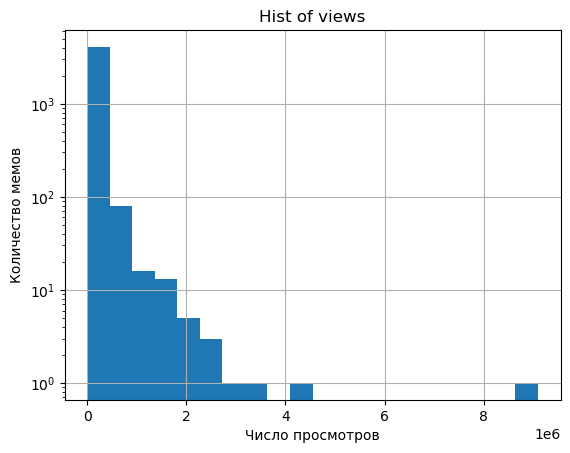

In [23]:
memes.views.hist(log = True, bins = 20)
plt.xlabel('Число просмотров')
plt.ylabel('Количество мемов')
plt.title('Hist of views');

In [24]:
memes['average_views'] = memes.views / (memes.days_from_creation + 1)
memes['average_comments'] = memes.comments / (memes.days_from_creation + 1)

In [25]:
memes.average_views.max()

381029.0

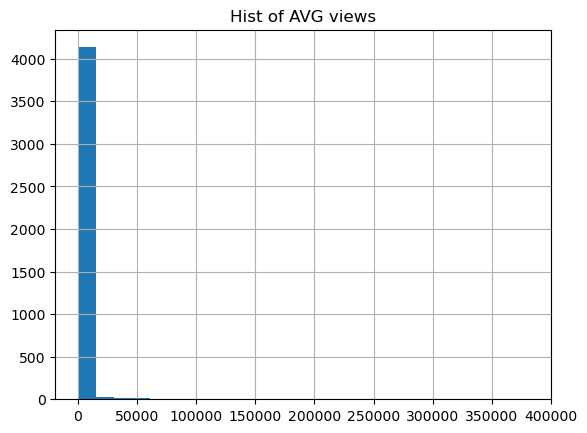

In [26]:
memes['average_views'].hist(bins = 25);
plt.title('Hist of AVG views');

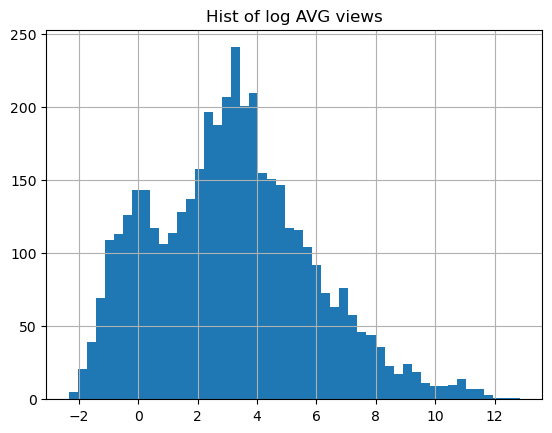

In [27]:
memes.average_views.apply(lambda x: np.log(x)).hist(bins = 50)
plt.title('Hist of log AVG views');

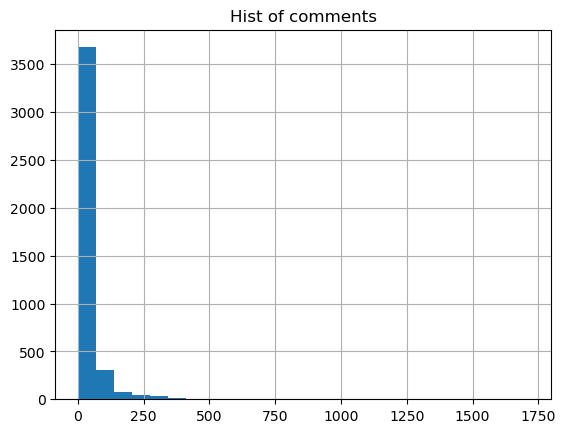

In [28]:
memes['comments'].hist(bins = 25)
plt.title('Hist of comments');


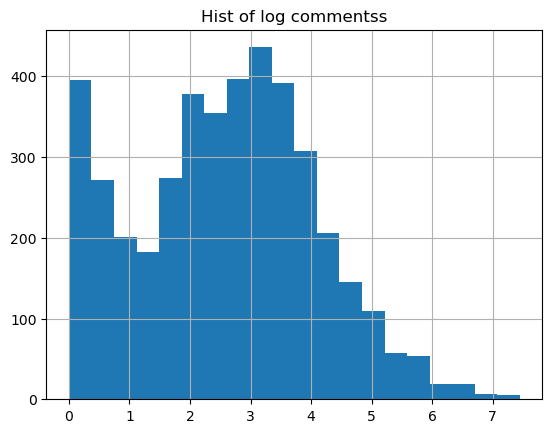

In [29]:
memes.comments.apply(lambda x: np.log(x+1)).hist(bins = 20)
plt.title('Hist of log commentss');

In [30]:
memes

Unnamed: 0                                         name      status  \
0              0                                   Muvvafukka  Submission   
1              1  Martyrdom (Drop a Live Grenade When Killed)  Submission   
2              2                                 Wet Kylo Ren  Submission   
3              3                               You're Invited  Submission   
4              4            Companies Posting Their Own Names  Submission   
...          ...                                          ...         ...   
4201        4201                                   In G Major   Confirmed   
4202        4202                          Blood Diamond Pants    Deadpool   
4203        4203                       Because of Parkinson's   Confirmed   
4204        4204                              Paranoid Parrot   Confirmed   
4205        4205                I Believe You Have My Stapler   Confirmed   

                       type  origin_year  \
0               Viral Video         2019   
1                  Reaction         2007   
2               Image Macro         2019   
3                    Parody         2019   
4       Participatory Media         2019   
...                     ...          ...   
4201                    NaN         2007   
4202                    NaN         2007   
4203                    NaN         2006   
4204            Image Macro         2009   
4205  Pop Culture Reference         2004   

                                          origin_place  \
0                                             Facebook   
1                       Call of Duty 4: Modern Warfare   
2     Star Wars: The Rise of Skywalker (Movie Trailer)   
3                                               TikTok   
4                                             Facebook   
...                                                ...   
4201                                           YouTube   
4202                                MilitaryPhotos.net   
4203                                             YTMND   
4204                                               r9k   
4205                                             YTMND   

                     date_added   views  videos  photos  ...  \
0     2019-10-24T04:05:03-04:00   13613       0       7  ...   
1     2019-10-23T12:13:13-04:00   13973       0      17  ...   
2     2019-10-23T11:56:19-04:00    5339       0      12  ...   
3     2019-10-23T10:32:04-04:00    2249       0       0  ...   
4     2019-10-25T12:42:22-04:00    5662       0      16  ...   
...                         ...     ...     ...     ...  ...   
4201  2018-01-16T05:32:05-05:00  111531      61       2  ...   
4202  2010-01-01T02:34:03-05:00   16348       0       0  ...   
4203  2013-09-26T16:26:49-04:00  205323       2     101  ...   
4204  2019-10-31T03:47:02-04:00  416158       2     218  ...   
4205  2018-04-09T16:28:49-04:00  109512       1      25  ...   

                                             other_text  \
0     Butler also made a screenshot of Hilzinger's f...   
1     Spread The exact first instance of use of the ...   
2     Shortly after the trailer's release, some on T...   
3     Spread On October 15th, 2019, @moneyxmo upload...   
4     Before October 2019, a number of companies and...   
...                                                 ...   
4201  However, even though Gallers played an influen...   
4202  "Godspeed", the forum member who posted the or...   
4203  The first instance of Michael J. Fox's equatio...   
4204  In 2007, the same image was used to illustrate...   
4205  Milton Waddams (played by actor Stephen Root) ...   

                      timestamp  Year Month Day Hour  Weekday  \
0     2019-10-24 04:05:03-04:00  2019    10  24    4        3   
1     2019-10-23 12:13:13-04:00  2019    10  23   12        2   
2     2019-10-23 11:56:19-04:00  2019    10  23   11        2   
3     2019-10-23 10:32:04-04:00  2019    10  23   10        2   
4     2019-10-25 12:42:22-04:00  2019    10  25   12

In [31]:
popular = memes.sort_values(by = 'average_comments', ascending = False)

for mem in popular.index.tolist()[:7]:
    print('Meme name')
    print(popular.loc[mem, 'name'])
    print('Average comments per day {}'.format(popular.loc[mem, 'average_comments']))
    print('============\n')

Meme name
Miley Cyrus
Average comments per day 90.33333333333333

Meme name
McDonald’s "Happy" Mascot
Average comments per day 88.0

Meme name
Hero Cat
Average comments per day 60.0

Meme name
Colonel Meow
Average comments per day 56.0

Meme name
Bob the Builder
Average comments per day 56.0

Meme name
Mike Pence
Average comments per day 53.666666666666664

Meme name
Scout Face
Average comments per day 38.0



In [32]:
memes[['status','type','origin_place']].describe()

status         type origin_place
count         4206         1786         4205
unique           3           98         1885
top     Submission  Exploitable      Unknown
freq          2482          152          535

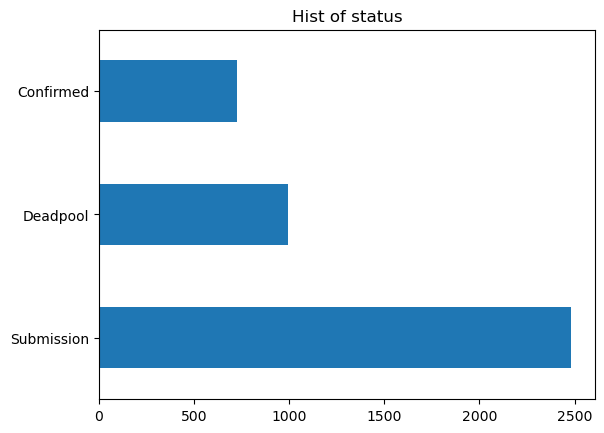

In [33]:
memes.status.value_counts().plot(kind = 'barh')
plt.title('Hist of status')
plt.show()

In [34]:
pd.get_dummies(memes.status, prefix = 'is', dummy_na= True)

is_Confirmed  is_Deadpool  is_Submission  is_nan
0                0            0              1       0
1                0            0              1       0
2                0            0              1       0
3                0            0              1       0
4                0            0              1       0
...            ...          ...            ...     ...
4201             1            0              0       0
4202             0            1              0       0
4203             1            0              0       0
4204             1            0              0       0
4205             1            0              0       0

[4206 rows x 4 columns]

In [35]:
cnt = memes.type.value_counts()
big_values = set(cnt[cnt >= 30].index)
big_values

{'Anime',
 'Catchphrase',
 'Character',
 'Controversy',
 'Copypasta',
 'Exploitable',
 'Image Macro',
 'Parody',
 'Participatory Media',
 'Pop Culture Reference',
 'Reaction',
 'Remix',
 'Slang',
 'Song',
 'Video Game',
 'Viral Video'}

##### Заменим малочисленные категории на other

In [36]:
memes['type'] = memes.type.apply(lambda x: x if x in big_values else 'Another')

<AxesSubplot:>

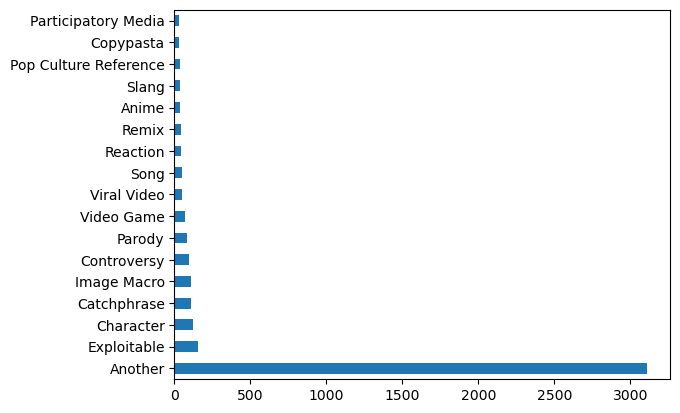

In [37]:
memes.type.value_counts().plot(kind  = 'barh')

___

In [38]:
memes.origin_place.value_counts()

Unknown                                           535
YouTube                                           354
Twitter                                           322
4chan                                             179
Reddit                                            141
                                                 ... 
Johan Brand, Jamie Brooker and Morten Versvik.      1
P.E.P.E.                                            1
Toy Story                                           1
Paper Mario and the Thousand Year Door              1
r9k                                                 1
Name: origin_place, Length: 1885, dtype: int64

In [39]:
cnt = memes.origin_place.value_counts()
big_category = set(cnt[cnt >= 30].index)
big_category

{'4chan',
 'Facebook',
 'Instagram',
 'Reddit',
 'Tumblr',
 'Twitter',
 'Unknown',
 'YouTube',
 'Youtube',
 'niconico'}

In [40]:
memes['origin_place'] = memes.origin_place.apply(lambda x: x if x in big_category else 'Another')

<AxesSubplot:>

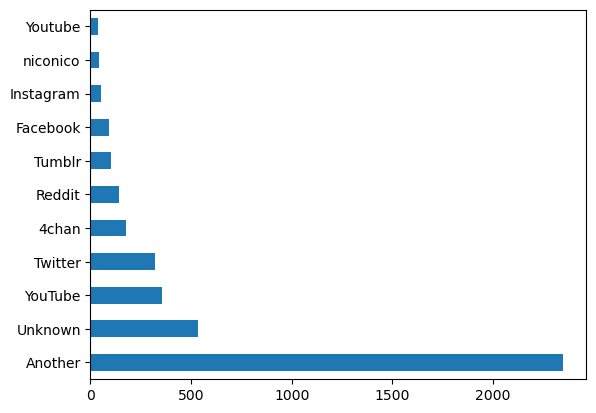

In [41]:
memes.origin_place.value_counts().plot(kind  = 'barh')

In [42]:
memes[['tags','about','origin','other_text']]

tags  \
0     jay-lee hilzinger & maddie flynn, eshayz, davi...   
1     perk, martyrdom, live grenade, reaction image,...   
2     kylo ren, star wars the rise of skywalker, ada...   
3                byob, byow, party, flyer, charge, door   
4     social media campaign, brands, companies, max ...   
...                                                 ...   
4201  youtube poop, audio, harmonizer, remix, scary,...   
4202                                            none...   
4203  michael j. fox, joke, image macro, 4chan, cele...   
4204  4chan, parrot, paranoia, paranoid parrot, advi...   
4205  movie, catchphrase, film, office space, movie ...   

                                                  about  \
0     Muvvafukka refers to a viral video of two teen...   
1     Martyrdom (Drop a Live Grenade When Killed) re...   
2     Wet Kylo Ren is an image macro series based on...   
3     You're Invited is a series of TikTok videos pa...   
4     Companies Posting Their Own Names refers to a ...   
...                                                 ...   
4201  The "In G Major" Youtube Poop fad, or Poopism,...   
4202  Blood Diamond Pants is a reference to the gene...   
4203  Because of Parkinson's (also known as "Michael...   
4204  Paranoid Parrot is an advice animal image macr...   
4205                                                NaN   

                                                 origin  \
0     While it appears the original video is deleted...   
1     On April 12th, 2007, first person shooter Call...   
2     On October 21st, 2019, the final trailer for t...   
3     On October 13th, 2019, TikTok user @coolguycol...   
4     On October 18th, 2019, Australian musician and...   
...                                                 ...   
4201  Chewiki credits Youtube Pooper Gallas as the o...   
4202                                                NaN   
4203  Michel J. Fox is an Canadian–American actor an...   
4204  While the photographer is unknown, the origina...   
4205  Office Space was a 1999 comedy by Beavis and B...   

                                             other_text  
0     Butler also made a screenshot of Hilzinger's f...  
1     Spread The exact first instance of use of the ...  
2     Shortly after the trailer's release, some on T...  
3     Spread On October 15th, 2019, @moneyxmo upload...  
4     Before October 2019, a number of companies and...  
...                                                 ...  
4201  However, even though Gallers played an influen...  
4202  "Godspeed", the forum member who posted the or...  
4203  The first instance of Michael J. Fox's equatio...  
4204  In 2007, the same image was used to illustrate...  
4205  Milton Waddams (played by actor Stephen Root) ...  

[4206 rows x 4 columns]

In [43]:
memes['tags_len']= memes.tags.str.len()

<AxesSubplot:>

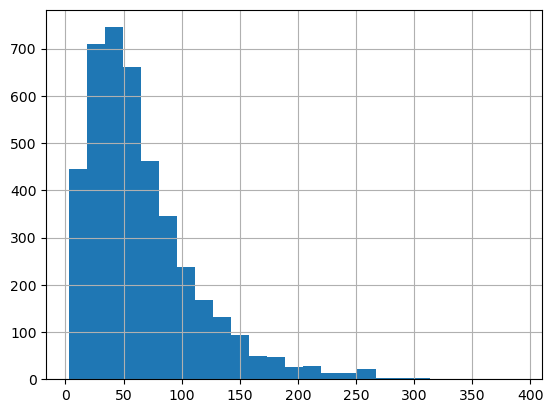

In [44]:
memes.tags_len.hist(bins = 25)

In [45]:
memes.set_index('name',inplace = True)

In [46]:
memes.drop(['tags','about','origin','other_text','date_added','timestamp','Unnamed: 0'], axis =1, inplace = True)

In [47]:
memes.isnull().sum()

status                0
type                  0
origin_year           0
origin_place          0
views                 0
videos                0
photos                0
comments              0
Year                  0
Month                 0
Day                   0
Hour                  0
Weekday               0
days_from_creation    0
average_views         0
average_comments      0
tags_len              1
dtype: int64

In [48]:
memes.tags_len.fillna(0, inplace = True)

In [49]:
memes.shape

(4206, 17)

In [50]:
memes_dummy = pd.get_dummies(memes)
memes_dummy

origin_year   views  videos  \
name                                                                       
Muvvafukka                                          2019   13613       0   
Martyrdom (Drop a Live Grenade When Killed)         2007   13973       0   
Wet Kylo Ren                                        2019    5339       0   
You're Invited                                      2019    2249       0   
Companies Posting Their Own Names                   2019    5662       0   
...                                                  ...     ...     ...   
In G Major                                          2007  111531      61   
Blood Diamond Pants                                 2007   16348       0   
Because of Parkinson's                              2006  205323       2   
Paranoid Parrot                                     2009  416158       2   
I Believe You Have My Stapler                       2004  109512       1   

                                             photos  comments  Year  Month  \
name                                                                         
Muvvafukka                                        7         8  2019     10   
Martyrdom (Drop a Live Grenade When Killed)      17         8  2019     10   
Wet Kylo Ren                                     12         7  2019     10   
You're Invited                                    0         0  2019     10   
Companies Posting Their Own Names                16        33  2019     10   
...                                             ...       ...   ...    ...   
In G Major                                        2        37  2018      1   
Blood Diamond Pants                               0         5  2010      1   
Because of Parkinson's                          101        61  2013      9   
Paranoid Parrot                                 218        51  2019     10   
I Believe You Have My Stapler                    25        29  2018      4   

                                             Day  Hour  Weekday  ...  \
name                                                             ...   
Muvvafukka                                    24     4        3  ...   
Martyrdom (Drop a Live Grenade When Killed)   23    12        2  ...   
Wet Kylo Ren                                  23    11        2  ...   
You're Invited                                23    10        2  ...   
Companies Posting Their Own Names             25    12        4  ...   
...                                          ...   ...      ...  ...   
In G Major                                    16     5        1  ...   
Blood Diamond Pants                            1     2        4  ...   
Because of Parkinson's                        26    16        3  ...   
Paranoid Parrot                               31     3        3  ...   
I Believe You Have My Stapler                  9    16        0  ...   

                                             origin_place_Another  \
name                                                                
Muvvafukka                                                      0   
Martyrdom (Drop a Live Grenade When Killed)                     1   
Wet Kylo Ren                                                    1   
You're Invited                                                  1   
Companies Posting Their Own Names                               0   
...                                                           ...   
In G Major                                                      0   
Blood Diamond Pants                                             1   
Because of Parkinson's                                          1   
Paranoid Parrot                                                 1   
I Believe You Have My Stapler                                   1   

                                             origin_place_Facebook  \
name                                                                 
Muvvafukka                                                       1

___

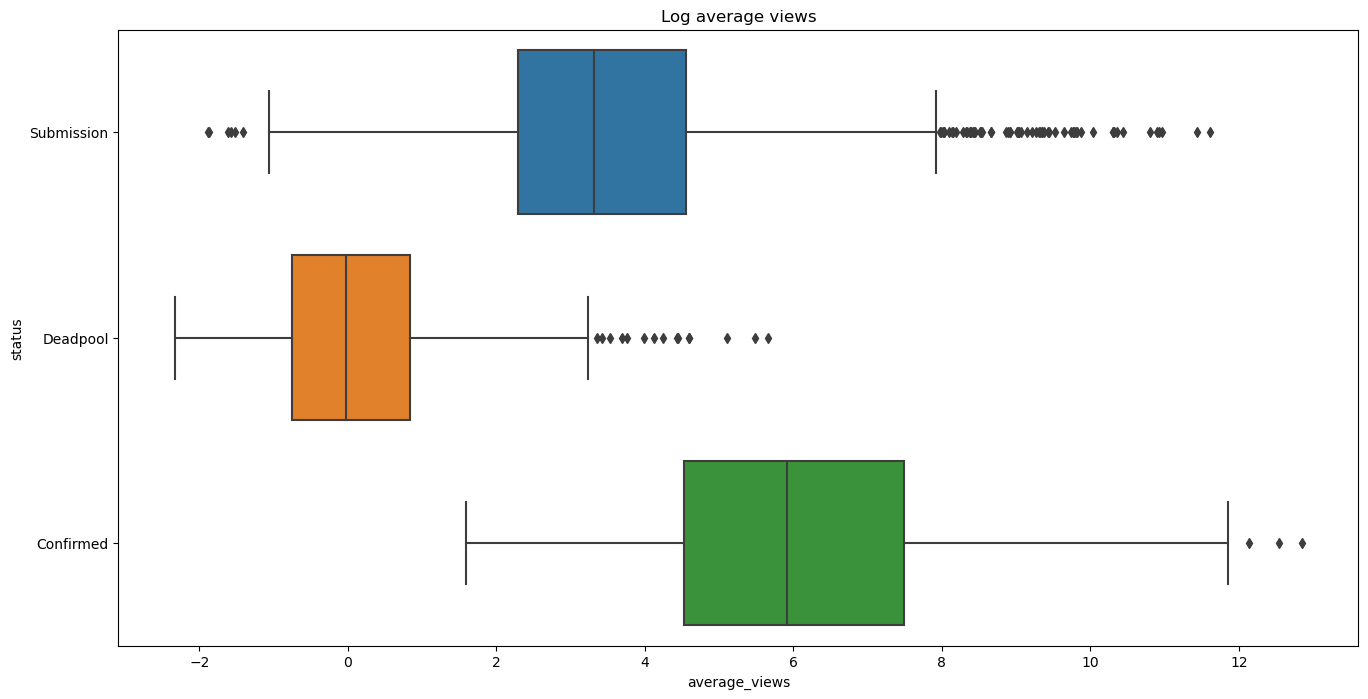

In [51]:
plt.figure(figsize = (16,8))
sns.boxplot(x = np.log(memes.average_views), y = memes.status)
plt.title('Log average views')
plt.show()

In [52]:
memes['log_average_views'] = np.log(memes.average_views)

<AxesSubplot:title={'center':'log_average_views'}, xlabel='Hour'>

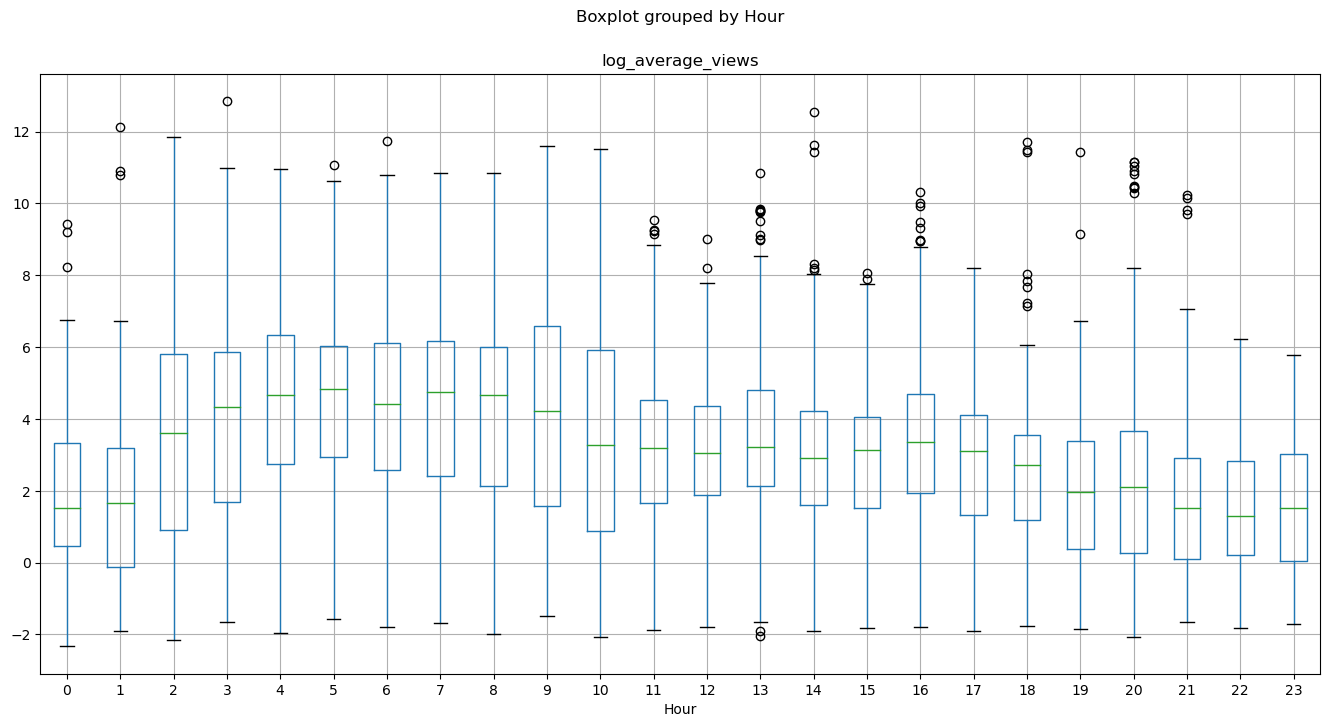

In [53]:
memes.boxplot(column = 'log_average_views', by = 'Hour', figsize = (16,8))

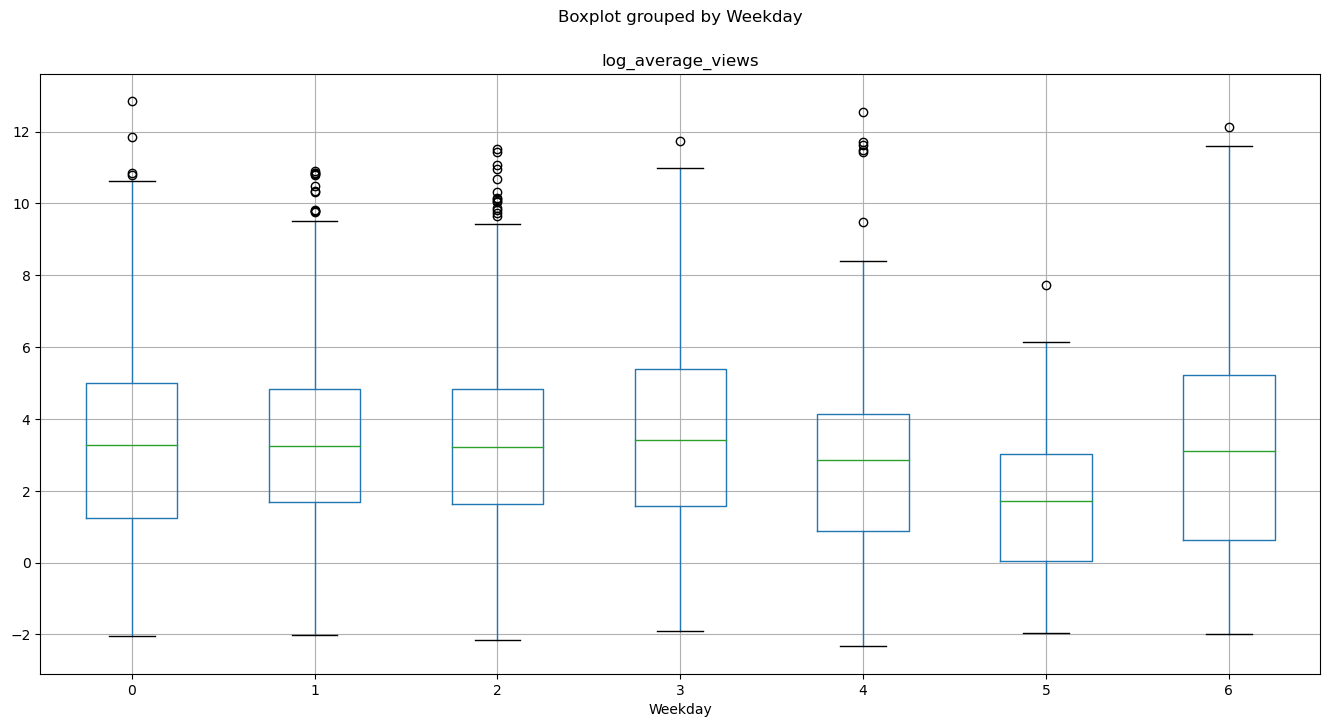

In [54]:
memes.boxplot(column = 'log_average_views', by = 'Weekday', figsize = (16,8));

#### Посмотрим на корреляцию между переменными

<AxesSubplot:>

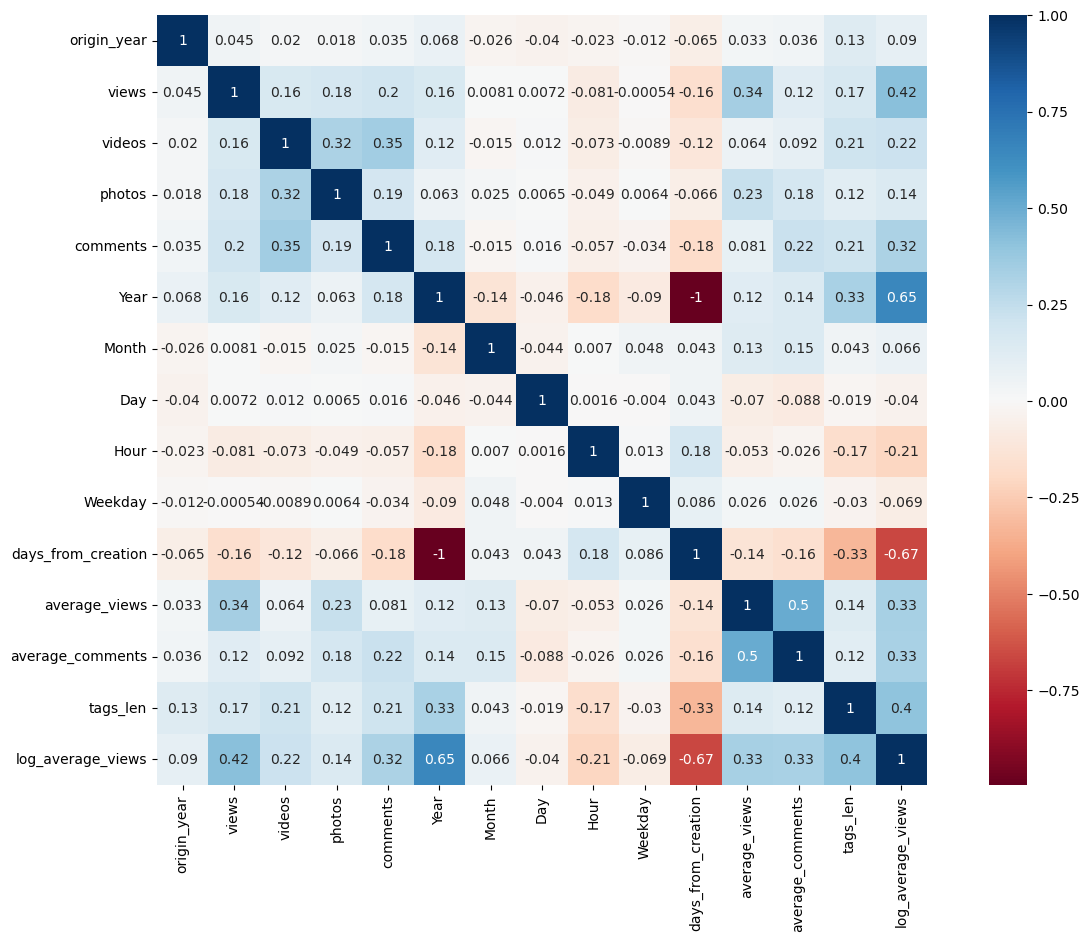

In [55]:
plt.subplots(figsize = (16,10))
sns.heatmap(memes.corr(), square=True, annot = True, cmap = 'RdBu')